In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


LIBRARIES

In [ ]:
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import re
import nltk
import json
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
np.random.seed(42)
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import ToktokTokenizer
import nltk, string, re, spacy,unicodedata, random
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
folder_path = '/content/drive/MyDrive/Colab Notebooks/NLP END SEM/'

# Tamil Dataset Abusive

In [ ]:
train_data = pd.read_csv(folder_path + "mal_full_offensive_train.csv",delimiter='\t',header = None)
valid_data = pd.read_csv(folder_path + "mal_full_offensive_dev.csv",delimiter='\t',header = None)
test_data = pd.read_csv(folder_path + "mal_full_offensive_test.csv",delimiter='\t',header = None)

In [ ]:
train_data = train_data.drop(columns=2)
train_data = train_data.rename(columns={0:'text',1:'label'})
valid_data = valid_data.drop(columns=2)
valid_data = valid_data.rename(columns={0:'text',1:'label'})
test_data = test_data.rename(columns={0:'text'})

In [ ]:
train_data['label'].value_counts()

Not_offensive                           14153
not-malayalam                            1287
Offensive_Targeted_Insult_Individual      239
Offensive_Untargetede                     191
Offensive_Targeted_Insult_Group           140
Name: label, dtype: int64

In [ ]:
valid_data['label'].value_counts()

Not_offensive                           1779
not-malayalam                            163
Offensive_Targeted_Insult_Individual      24
Offensive_Untargetede                     20
Offensive_Targeted_Insult_Group           13
Name: label, dtype: int64

In [ ]:
train_data['enc_label'] = train_data['label'].replace({'Not_offensive':0, 'not-malayalam':1,'Offensive_Targeted_Insult_Individual':2
                                                       ,'Offensive_Untargetede':3,'Offensive_Targeted_Insult_Group':4
                                                       })
valid_data['enc_label'] = valid_data['label'].replace({'Not_offensive':0, 'not-malayalam':1,'Offensive_Targeted_Insult_Individual':2
                                                       ,'Offensive_Untargetede':3,'Offensive_Targeted_Insult_Group':4
                                                       })

In [ ]:
train_data

,text,label,enc_label
0,പലദേശം. പല ഭാഷ ഒരേ ഒരു രാജാവ് അല്ലാതെ സ്വന്ത...,Not_offensive,0
1,ഈ ഓണം ഏട്ടനും പിള്ളേർക്ക് ഉള്ളതാണ് എന്ന് ഉള്ളവ...,Not_offensive,0
2,ആരണ്ട ആരണ്ട തലുണ്ടാകാണാ ആരണ്ട ഞാൻ ആണ്ട ഞാൻ ആണ്...,Not_offensive,0
3,Sushin syam Shaiju khalid Midhun manual,Not_offensive,0
4,J A K E S. B EJ O Y !!!,Not_offensive,0
...,...,...,...
16005,കട്ട ലാലേട്ടൻ ഫാൻസിന് ദൈവത്തെ ഓർത്ത് അമിത പ്രത...,Not_offensive,0
16006,ente mammookka ningal puliyalla oru simhama......,Not_offensive,0
16007,Lucifer mass dialogues Ellam onnu comment chey...,Not_offensive,0
16008,Like from Madurai (Tamil nadu) ....,not-malayalam,1


In [ ]:
train_data['text'].tolist()

['പലദേശം. പല ഭാഷ ഒരേ ഒരു രാജാവ്  അല്ലാതെ  സ്വന്തം രാജവയത് അല്ല',
 'ഈ ഓണം ഏട്ടനും പിള്ളേർക്ക് ഉള്ളതാണ് എന്ന് ഉള്ളവർ ലൈക്\u200c അടി',
 'ആരണ്ട ആരണ്ട തലുണ്ടാകാണാ ആരണ്ട ഞാൻ ആണ്ട ഞാൻ ആണ്ട ഞാൻ Royal Mech ആടാ  ആരണ്ട ആരണ്ട മീശ പിരിക്കുന്ന ആരണ്ട ഞാൻ ആണ്ട ഞാൻ ആണ്ട ഞാൻ royal Mech ആടാ',
 'Sushin syam  Shaiju khalid  Midhun manual',
 'J A K E S.   B EJ O Y !!!',
 'Pwoli item padam kananda ennu karuthiyatha pakshe ini kaanum',
 'Oru ratchasan feel kittitu ullalo. Bgm athra adipoliyano',
 'Super casting',
 'ഷൈലോക്ക് ന്റെ നല്ല ടീസർ ആയിട്ട് പോലും ട്രോളി നടന്ന ലാലേട്ടൻ ഫാൻസിന് കിട്ടിയൊരു നല്ലൊരു തിരിച്ചടി തന്നെ ആയിരിന്നു ബിഗ് ബ്രദർ ന്റെ ട്രെയ്\u200cലർ',
 'ന്റമ്മോ ഇജ്ജാതി trailor.. Uffftrailor ethegilum.. Padam. Pwoliyo pwoli',
 'ഇത് ബോംബ് ആകും എന്ന് തോന്നുന്നവർ Like അടിക്ക്....',
 'Ee asurante varavin katta waiting........MAMMOOKKA.. uyir',
 'Rajuvettan chunkalla chunkidipaan adi makalle like Neela adi chunk കളെ',
 'Ettan kurch koode perfect akum enn vicharikunu by H',
 'മാമാങ്കത്തിൽ മമ്മൂക്കയെ കണ്ടു . ഇ

In [ ]:
train_data['enc_label'].value_counts()

0    14153
1     1287
2      239
3      191
4      140
Name: enc_label, dtype: int64

In [ ]:
valid_data['enc_label'].value_counts()

0    1779
1     163
2      24
3      20
4      13
Name: enc_label, dtype: int64

In [ ]:
print("Size of the training data ==> ", train_data.shape)
print("Size of the validation data ==>", valid_data.shape)
print("Size of the Test data ==>", test_data.shape)

Size of the training data ==>  (16010, 3)
Size of the validation data ==> (1999, 3)
Size of the Test data ==> (2001, 3)


One Hot Encoding

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder=OneHotEncoder(sparse=False)

encoded_labels = pd.DataFrame (encoder.fit_transform(train_data[['label']]))

encoded_labels .columns = encoder.get_feature_names_out(['label'])

train_data= pd.concat([train_data, encoded_labels ], axis=1)

In [ ]:
train_data.columns

Index(['text', 'label', 'enc_label', 'label_Not_offensive',
       'label_Offensive_Targeted_Insult_Group',
       'label_Offensive_Targeted_Insult_Individual',
       'label_Offensive_Untargetede', 'label_not-malayalam'],
      dtype='object')

In [ ]:
train_data = train_data.rename(columns={'label_Not_offensive':'Not_offensive','label_Offensive_Targeted_Insult_Group':'Offensive_Targeted_Insult_Group',
       'label_Offensive_Targeted_Insult_Individual':'Offensive_Targeted_Insult_Individual',
       'label_Offensive_Untargetede':'Offensive_Untargetede', 'label_not-malayalam':'not-malayalam'})
train_data

,text,label,enc_label,Not_offensive,Offensive_Targeted_Insult_Group,Offensive_Targeted_Insult_Individual,Offensive_Untargetede,not-malayalam
0,പലദേശം. പല ഭാഷ ഒരേ ഒരു രാജാവ് അല്ലാതെ സ്വന്ത...,Not_offensive,0,1.0,0.0,0.0,0.0,0.0
1,ഈ ഓണം ഏട്ടനും പിള്ളേർക്ക് ഉള്ളതാണ് എന്ന് ഉള്ളവ...,Not_offensive,0,1.0,0.0,0.0,0.0,0.0
2,ആരണ്ട ആരണ്ട തലുണ്ടാകാണാ ആരണ്ട ഞാൻ ആണ്ട ഞാൻ ആണ്...,Not_offensive,0,1.0,0.0,0.0,0.0,0.0
3,Sushin syam Shaiju khalid Midhun manual,Not_offensive,0,1.0,0.0,0.0,0.0,0.0
4,J A K E S. B EJ O Y !!!,Not_offensive,0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
16005,കട്ട ലാലേട്ടൻ ഫാൻസിന് ദൈവത്തെ ഓർത്ത് അമിത പ്രത...,Not_offensive,0,1.0,0.0,0.0,0.0,0.0
16006,ente mammookka ningal puliyalla oru simhama......,Not_offensive,0,1.0,0.0,0.0,0.0,0.0
16007,Lucifer mass dialogues Ellam onnu comment chey...,Not_offensive,0,1.0,0.0,0.0,0.0,0.0
16008,Like from Madurai (Tamil nadu) ....,not-malayalam,1,0.0,0.0,0.0,0.0,1.0


In [ ]:
'''
Text Cleaning
'''
def text_cleaning(row):
  # to remove HTML tags
  text = BeautifulSoup(row, 'html.parser').get_text()
  d = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', text, flags=re.MULTILINE) #This line is for removing url
  post = d.replace('\n', '')
  post = post.replace('—', ' ')
  # to remove accented characters
  new_text = unicodedata.normalize('NFKD', post).encode('ascii', 'ignore').decode('utf-8', 'ignore')
  # to remove special characters and numbers
  # define the pattern to keep
  #pat = r'[^a-zA-z0-9.,!?/:;\"\'\s]' 
  #text = re.sub(pat, '', new_text)
  #to remove punctuation
  text = ''.join([c for c in text if c not in string.punctuation])
  # to remove special characters
  pattern = r'^\s*|\s\s*'
  text = re.sub(pattern, ' ', text).strip()
  # convert into lower case
  text = text.lower() 
  # Stopword Removing
  tokenizer = ToktokTokenizer()
  # convert sentence into token of words
  tokens = tokenizer.tokenize(text)
  tokens = [token.strip() for token in tokens]
 

  return text

In [ ]:
train_data['cleaned'] = train_data['text'].apply(text_cleaning)
valid_data['cleaned'] = valid_data['text'].apply(text_cleaning)
test_data['cleaned'] = test_data['text'].apply(text_cleaning)


## Data samples after cleaning
print("Data samples after cleaning:\n")
for i in range(10):
  print("Original Data:===\n",train_data.text[i],"\nCleaned Data:===\n",train_data.cleaned[i],)

Data samples after cleaning:

Original Data:===
 പലദേശം. പല ഭാഷ ഒരേ ഒരു രാജാവ്  അല്ലാതെ  സ്വന്തം രാജവയത് അല്ല 
Cleaned Data:===
 പലദേശം പല ഭാഷ ഒരേ ഒരു രാജാവ് അല്ലാതെ സ്വന്തം രാജവയത് അല്ല
Original Data:===
 ഈ ഓണം ഏട്ടനും പിള്ളേർക്ക് ഉള്ളതാണ് എന്ന് ഉള്ളവർ ലൈക്‌ അടി 
Cleaned Data:===
 ഈ ഓണം ഏട്ടനും പിള്ളേർക്ക് ഉള്ളതാണ് എന്ന് ഉള്ളവർ ലൈക്‌ അടി
Original Data:===
 ആരണ്ട ആരണ്ട തലുണ്ടാകാണാ ആരണ്ട ഞാൻ ആണ്ട ഞാൻ ആണ്ട ഞാൻ Royal Mech ആടാ  ആരണ്ട ആരണ്ട മീശ പിരിക്കുന്ന ആരണ്ട ഞാൻ ആണ്ട ഞാൻ ആണ്ട ഞാൻ royal Mech ആടാ 
Cleaned Data:===
 ആരണ്ട ആരണ്ട തലുണ്ടാകാണാ ആരണ്ട ഞാൻ ആണ്ട ഞാൻ ആണ്ട ഞാൻ royal mech ആടാ ആരണ്ട ആരണ്ട മീശ പിരിക്കുന്ന ആരണ്ട ഞാൻ ആണ്ട ഞാൻ ആണ്ട ഞാൻ royal mech ആടാ
Original Data:===
 Sushin syam  Shaiju khalid  Midhun manual 
Cleaned Data:===
 sushin syam shaiju khalid midhun manual
Original Data:===
 J A K E S.   B EJ O Y !!! 
Cleaned Data:===
 j a k e s b ej o y
Original Data:===
 Pwoli item padam kananda ennu karuthiyatha pakshe ini kaanum 
Cleaned Data:===
 pwoli item padam kananda ennu karuthiyatha

In [ ]:
valid_data['cleaned'].shape

(1999,)

In [ ]:
def char_length(row):
    return len(row.split())

In [ ]:
train_data.columns

Index(['text', 'label', 'enc_label', 'Not_offensive',
       'Offensive_Targeted_Insult_Group',
       'Offensive_Targeted_Insult_Individual', 'Offensive_Untargetede',
       'not-malayalam', 'cleaned'],
      dtype='object')

In [ ]:
lables = ['Not_offensive','Offensive_Targeted_Insult_Group', 'Offensive_Targeted_Insult_Individual', 
          'Offensive_Untargetede',
          'not-malayalam']

# Count number of unique words in each set
def dataset_statistics(dataset):
  for l in lables:
    word_list = [word.strip() for t in list(dataset[dataset[l]==1.0].cleaned) for word in t.strip().split()]
    print(f"\nClass Name:--> {l} ") 
    print("Number of Words:{}".format(len(word_list))) 
    print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
    print("Maximum post length: {}".format(max(dataset[dataset[l]==1.0].cleaned.apply(char_length))))
    print("Average Words in texts: {}".format(np.mean(dataset[dataset[l]==1.0].cleaned.apply(char_length))))
    

In [ ]:
dataset_statistics(train_data)


Class Name:--> Not_offensive 
Number of Words:128830
Number of Unique Words:30002
Maximum post length: 186
Average Words in texts: 9.102663746202218

Class Name:--> Offensive_Targeted_Insult_Group 
Number of Words:1292
Number of Unique Words:746
Maximum post length: 26
Average Words in texts: 9.228571428571428

Class Name:--> Offensive_Targeted_Insult_Individual 
Number of Words:2886
Number of Unique Words:1526
Maximum post length: 55
Average Words in texts: 12.07531380753138

Class Name:--> Offensive_Untargetede 
Number of Words:1874
Number of Unique Words:1152
Maximum post length: 55
Average Words in texts: 9.811518324607329

Class Name:--> not-malayalam 
Number of Words:9136
Number of Unique Words:2208
Maximum post length: 24
Average Words in texts: 7.098679098679098


In [ ]:
def comments_length_per_class(dataset,set_name):
  label = dataset[['Not_offensive',
       'Offensive_Targeted_Insult_Group',
       'Offensive_Targeted_Insult_Individual', 'Offensive_Untargetede',
       'not-malayalam']]
  label = label.values
  comment = dataset['cleaned']
  comment = comment.values
  y = np.zeros(label.shape)
  for ix in range(comment.shape[0]):
      l = len(comment[ix].split())
      if label[ix][0] :
          y[ix][0] = l
      if label[ix][1] :
          y[ix][1] = l
  #color = ['red','green','blue','yellow','chartreuse'] 
  labelsplt = ['Not_offensive',
       'Offensive_Targeted_Insult_Group',
       'Offensive_Targeted_Insult_Individual', 'Offensive_Untargetede',
       'not-malayalam']
  color = ['green','red','yellow','black','blue']    
  bins = [1,20,40,60,80]   
  plt.figure(figsize=(5,3)) 
  #plt.title ('Tweets Length Distribution Per Class')
  plt.hist(y,bins = bins,label = labelsplt,color = color)
  plt.axis([0, 80, 0, 17000])
  plt.xlabel('Length of texts')
  plt.ylabel('Number of texts') 
  plt.legend()
  #plt.savefig(path+'real-fake_no_title.png',dpi = 600,bbox_inches ='tight')
  #plt.grid(True)
  plt.show()

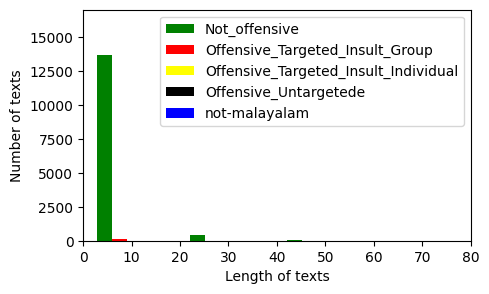

In [ ]:
comments_length_per_class(train_data,'Training')

In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [ ]:
pip install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 36.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 73.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 653.6/653.6 kB 63.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 98.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 18.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 50.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Prepari

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0" 

In [ ]:
import ktrain
from ktrain import text

In [ ]:
train_data['label'].value_counts()

Not_offensive                           14153
not-malayalam                            1287
Offensive_Targeted_Insult_Individual      239
Offensive_Untargetede                     191
Offensive_Targeted_Insult_Group           140
Name: label, dtype: int64

In [ ]:
X_train = train_data['text'].tolist()
y_train = train_data['label'].tolist()

X_valid = valid_data['text'].tolist()
y_valid = valid_data['label'].tolist()

X_test = test_data['text'].tolist()
#y_test = test_data['label'].tolist()

In [ ]:
categories = ['Not_offensive',
       'Offensive_Targeted_Insult_Group',
       'Offensive_Targeted_Insult_Individual', 'Offensive_Untargetede',
       'not-malayalam']

In [ ]:
model_name = 'bert-base-multilingual-cased'
trans = text.Transformer(model_name,maxlen=50,class_names=categories)

In [ ]:
train = trans.preprocess_train(X_train,y_train)
valid = trans.preprocess_test(X_valid,y_valid)
#test = trans.preprocess_test(X_test,y_test)

preprocessing train...
language: ml
train sequence lengths:
	mean : 9
	95percentile : 18
	99percentile : 31


Is Multi-Label? False
preprocessing test...
language: ml
test sequence lengths:
	mean : 9
	95percentile : 18
	99percentile : 34


In [ ]:
model = trans.get_classifier()

In [ ]:
learner = ktrain.get_learner(model, train_data=train,val_data=valid, batch_size=12)


In [ ]:
#learner.lr_find(show_plot = True,max_epochs=10)

In [ ]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight = 'balanced'
                                               ,classes = np.unique(y_train)
                                               ,y = y_train)

weight = {i : class_weights[i] for i in range(5)}
weight

{0: 0.22624178619373983,
 1: 22.87142857142857,
 2: 13.397489539748953,
 3: 16.76439790575916,
 4: 2.487956487956488}

In [ ]:
learner.fit_onecycle(2e-5,15,class_weight=weight)     #2e-5        



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/15
1335/1335 [==============================] - 297s 202ms/step - loss: 1.4072 - accuracy: 0.4256 - val_loss: 1.4212 - val_accuracy: 0.3257
Epoch 2/15
1335/1335 [==============================] - 255s 191ms/step - loss: 1.1259 - accuracy: 0.4272 - val_loss: 0.8741 - val_accuracy: 0.7819
Epoch 3/15
1335/1335 [==============================] - 252s 189ms/step - loss: 0.9249 - accuracy: 0.5345 - val_loss: 0.8583 - val_accuracy: 0.6378
Epoch 4/15
1335/1335 [==============================] - 256s 191ms/step - loss: 0.7159 - accuracy: 0.6265 - val_loss: 0.9797 - val_accuracy: 0.6088
Epoch 5/15
1335/1335 [==============================] - 252s 189ms/step - loss: 0.5539 - accuracy: 0.6951 - val_loss: 0.9093 - val_accuracy: 0.6698
Epoch 6/15
1335/1335 [==============================] - 252s 189ms/step - loss: 0.4618 - accuracy: 0.7535 - val_loss: 0.4803 - val_accuracy: 0.8439
Epoch 7/15
1335/1335 [===========================

In [ ]:
learner.validate(class_names=categories)

63/63 [==============================] - 10s 116ms/step
                                      precision    recall  f1-score   support

                       Not_offensive       0.98      0.96      0.97      1779
     Offensive_Targeted_Insult_Group       0.36      0.77      0.49        13
Offensive_Targeted_Insult_Individual       0.67      0.58      0.62        24
               Offensive_Untargetede       0.55      0.60      0.57        20
                       not-malayalam       0.81      0.91      0.86       163

                            accuracy                           0.95      1999
                           macro avg       0.67      0.77      0.70      1999
                        weighted avg       0.95      0.95      0.95      1999



array([[1709,   17,    7,   10,   36],
       [   3,   10,    0,    0,    0],
       [  10,    0,   14,    0,    0],
       [   7,    1,    0,   12,    0],
       [  14,    0,    0,    0,  149]])

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc=trans)

In [ ]:
predictor.save(folder_path+'Transformers_Models'+'/ml_offensive_m-bert_cw_predictor')


In [ ]:
predictor = ktrain.load_predictor(folder_path+'Transformers_Models'+'/ml_offensive_m-bert_cw_predictor')

In [ ]:
y_pred = predictor.predict(X_test)
y_pred

['Not_offensive',
 'Not_offensive',
 'Not_offensive',
 'Not_offensive',
 'Not_offensive',
 'Not_offensive',
 'Not_offensive',
 'Not_offensive',
 'Not_offensive',
 'Not_offensive',
 'Not_offensive',
 'not-malayalam',
 'Not_offensive',
 'Not_offensive',
 'Not_offensive',
 'Not_offensive',
 'Not_offensive',
 'Not_offensive',
 'Not_offensive',
 'Not_offensive',
 'Not_offensive',
 'Not_offensive',
 'Not_offensive',
 'Not_offensive',
 'Not_offensive',
 'not-malayalam',
 'not-malayalam',
 'Not_offensive',
 'Not_offensive',
 'Not_offensive',
 'Not_offensive',
 'Not_offensive',
 'Not_offensive',
 'Not_offensive',
 'Not_offensive',
 'Not_offensive',
 'Not_offensive',
 'Not_offensive',
 'Not_offensive',
 'Not_offensive',
 'Not_offensive',
 'Not_offensive',
 'Not_offensive',
 'Not_offensive',
 'Not_offensive',
 'Not_offensive',
 'Not_offensive',
 'Not_offensive',
 'Not_offensive',
 'Not_offensive',
 'Not_offensive',
 'Offensive_Targeted_Insult_Individual',
 'Not_offensive',
 'Not_offensive',
 'Not

In [ ]:
test_data['id'] = test_data.index+1

In [ ]:
run = pd.DataFrame(test_data['id'])
run['text'] = test_data['text']
run['label'] = y_pred
run

,id,text,label
0,1,അപ്പൊ ഇതൊരൊന്നൊരാ മൊതലാണല്ലേ Suraj ആണ് നടൻ ന്...,Not_offensive
1,2,എന്ത് ഊള എഡിറ്റിംഗ് ആടോ ഇത് ഒരുമാതിരി vivo vid...,Not_offensive
2,3,Fefka ee padam release cheyyan samadhicho?,Not_offensive
3,4,അആഹാ.. സംഗീതം ജെക്‌സ് ബിജോയ് ആണ് അപ്പൊ പൊട്ടലു...,Not_offensive
4,5,Ravile thane views likes ethra ayyi enn nokan ...,Not_offensive
...,...,...,...
1996,1997,Swargatthil ninnu purathaakkappetta daivatthin...,Not_offensive
1997,1998,Ivide Palakkad Jayettan Fans club nnu ashamsak...,Not_offensive
1998,1999,ഈ പടത്തിന് വെയിറ്റ് ചെയ്യുന്ന മമ്മൂക്ക ഫാൻസും,Not_offensive
1999,2000,കട്ട ലാലേട്ടൻ ഫാൻസ് ഒരു ലൈക് തന്നിട്ട് പോവാമോ ...,Not_offensive


In [ ]:
run['label'].value_counts()

Not_offensive                           1744
not-malayalam                            177
Offensive_Targeted_Insult_Individual      31
Offensive_Untargetede                     25
Offensive_Targeted_Insult_Group           24
Name: label, dtype: int64

In [ ]:
run.to_csv(folder_path +'malayalam_off_indic-bert_cw.csv',index = False)

Machine Learning

In [ ]:
def print_metrices(true,pred):
    print(confusion_matrix(true,pred))
    print(classification_report(true,pred,))
    print("Accuracy : ",accuracy_score(true,pred))
    print("Precison : ",precision_score(true,pred, average = 'weighted'))
    print("Recall : ",recall_score(true,pred,  average = 'weighted'))
    print("F1 : ",f1_score(true,pred,  average = 'weighted'))

In [ ]:
## TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
#use_idf=True,tokenizer=lambda x: x.split()
vectorizer = TfidfVectorizer(tokenizer=lambda x: x.split())
vectorised_posts = vectorizer.fit_transform(train_data['cleaned'])
vectorized_train_posts = vectorizer.transform(train_data['cleaned'])
vectorized_valid_posts = vectorizer.transform(valid_data['cleaned'])
vectorized_test_posts = vectorizer.transform(test_data['cleaned'])

print("Feature Size: ", vectorized_train_posts.shape[1])
#vectorizer.vocabulary_

Feature Size:  32597


In [ ]:
vectorized_valid_posts.shape

(1999, 32597)

In [ ]:
valid_data['enc_label'].value_counts()

0    1779
1     163
2      24
3      20
4      13
Name: enc_label, dtype: int64

In [ ]:
labels = ['Not_offensive',
       'Offensive_Targeted_Insult_Group',
       'Offensive_Targeted_Insult_Individual', 'Offensive_Untargetede',
       'not-malayalam']
def actual_label(row):
    return labels[row]

Logistic Regression

In [ ]:
# After Tunning
# Optimum C = 100 
lr = LogisticRegression(C=10,class_weight='balanced')
lr.fit(vectorized_train_posts,train_data['enc_label'])
y_pred = lr.predict(vectorized_valid_posts)
print_metrices(y_pred,valid_data['enc_label'])

[[1707   19   12    7    2]
 [  53  144    0    0    0]
 [   3    0   12    0    1]
 [  12    0    0   12    2]
 [   4    0    0    1    8]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1747
           1       0.88      0.73      0.80       197
           2       0.50      0.75      0.60        16
           3       0.60      0.46      0.52        26
           4       0.62      0.62      0.62        13

    accuracy                           0.94      1999
   macro avg       0.71      0.71      0.70      1999
weighted avg       0.94      0.94      0.94      1999

Accuracy :  0.9419709854927464
Precison :  0.9414366780530727
Recall :  0.9419709854927464
F1 :  0.9406070245164753


In [ ]:
test_pred = lr.predict(vectorized_test_posts).tolist()
test_data['id'] = test_data.index + 1

In [ ]:
run = pd.DataFrame(test_data['id'])
run['text'] = test_data['text']
run['label'] = test_pred
run['label'] = run['label'].apply(actual_label)
run 

,id,text,label
0,1,അപ്പൊ ഇതൊരൊന്നൊരാ മൊതലാണല്ലേ Suraj ആണ് നടൻ ന്...,Not_offensive
1,2,എന്ത് ഊള എഡിറ്റിംഗ് ആടോ ഇത് ഒരുമാതിരി vivo vid...,Not_offensive
2,3,Fefka ee padam release cheyyan samadhicho?,Not_offensive
3,4,അആഹാ.. സംഗീതം ജെക്‌സ് ബിജോയ് ആണ് അപ്പൊ പൊട്ടലു...,Not_offensive
4,5,Ravile thane views likes ethra ayyi enn nokan ...,Not_offensive
...,...,...,...
1996,1997,Swargatthil ninnu purathaakkappetta daivatthin...,Not_offensive
1997,1998,Ivide Palakkad Jayettan Fans club nnu ashamsak...,Not_offensive
1998,1999,ഈ പടത്തിന് വെയിറ്റ് ചെയ്യുന്ന മമ്മൂക്ക ഫാൻസും,Not_offensive
1999,2000,കട്ട ലാലേട്ടൻ ഫാൻസ് ഒരു ലൈക് തന്നിട്ട് പോവാമോ ...,Not_offensive


In [ ]:
run.to_csv(folder_path +'malayalam_off_lr.csv',index = False)

Support Vector Machine

In [ ]:
## SVM
from sklearn.svm import SVC
svc =  SVC(kernel='linear', C = 5,random_state=1234,class_weight='balanced')
svc.fit(vectorized_train_posts,train_data['enc_label'])
y_pred = svc.predict(vectorized_valid_posts)
print_metrices(y_pred,valid_data['enc_label'])

[[1723   24   12    7    5]
 [  49  139    0    0    0]
 [   2    0   12    0    0]
 [   3    0    0   12    0]
 [   2    0    0    1    8]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1771
           1       0.85      0.74      0.79       188
           2       0.50      0.86      0.63        14
           3       0.60      0.80      0.69        15
           4       0.62      0.73      0.67        11

    accuracy                           0.95      1999
   macro avg       0.71      0.82      0.75      1999
weighted avg       0.95      0.95      0.95      1999

Accuracy :  0.9474737368684342
Precison :  0.949644860451809
Recall :  0.9474737368684342
F1 :  0.9477131670240528


In [ ]:
test_pred = svc.predict(vectorized_test_posts).tolist()
test_data['id'] = test_data.index + 1

In [ ]:
run = pd.DataFrame(test_data['id'])
run['text'] = test_data['text']
run['label'] = test_pred
run['label'] = run['label'].apply(actual_label)
run 

,id,text,label
0,1,അപ്പൊ ഇതൊരൊന്നൊരാ മൊതലാണല്ലേ Suraj ആണ് നടൻ ന്...,Not_offensive
1,2,എന്ത് ഊള എഡിറ്റിംഗ് ആടോ ഇത് ഒരുമാതിരി vivo vid...,Not_offensive
2,3,Fefka ee padam release cheyyan samadhicho?,Not_offensive
3,4,അആഹാ.. സംഗീതം ജെക്‌സ് ബിജോയ് ആണ് അപ്പൊ പൊട്ടലു...,Not_offensive
4,5,Ravile thane views likes ethra ayyi enn nokan ...,Not_offensive
...,...,...,...
1996,1997,Swargatthil ninnu purathaakkappetta daivatthin...,Not_offensive
1997,1998,Ivide Palakkad Jayettan Fans club nnu ashamsak...,Not_offensive
1998,1999,ഈ പടത്തിന് വെയിറ്റ് ചെയ്യുന്ന മമ്മൂക്ക ഫാൻസും,Not_offensive
1999,2000,കട്ട ലാലേട്ടൻ ഫാൻസ് ഒരു ലൈക് തന്നിട്ട് പോവാമോ ...,Not_offensive


In [ ]:
run.to_csv(folder_path +'malayalam_off_svm.csv',index = False)


Ensemble Approach (Logistic Regression, Decision Tree, Random Forest)

In [ ]:
LogReg_clf = LogisticRegression(class_weight='balanced')
DTree_clf = DecisionTreeClassifier(class_weight='balanced')
rt_clf =   RandomForestClassifier(class_weight='balanced')
SVC_clf = SVC(class_weight='balanced')


voting_clf = VotingClassifier(estimators=[('SVC', SVC_clf), ('DTree', DTree_clf), ('LogReg', LogReg_clf),('RF', rt_clf)], voting='hard')
voting_clf.fit(vectorized_train_posts, train_data['enc_label'])
preds = voting_clf.predict(vectorized_valid_posts)


In [ ]:
print_metrices(valid_data['enc_label'],preds)

[[1756   18    1    3    1]
 [  32  131    0    0    0]
 [  12    0   12    0    0]
 [   9    0    0   11    0]
 [   6    0    0    0    7]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1779
           1       0.88      0.80      0.84       163
           2       0.92      0.50      0.65        24
           3       0.79      0.55      0.65        20
           4       0.88      0.54      0.67        13

    accuracy                           0.96      1999
   macro avg       0.89      0.68      0.76      1999
weighted avg       0.96      0.96      0.96      1999

Accuracy :  0.9589794897448725
Precison :  0.9573397221782045
Recall :  0.9589794897448725
F1 :  0.9567105054062787


In [ ]:
test_pred = voting_clf.predict(vectorized_test_posts).tolist()
test_data['id'] = test_data.index + 1

In [ ]:
run = pd.DataFrame(test_data['id'])
run['text'] = test_data['text']
run['label'] = test_pred
run['label'] = run['label'].apply(actual_label)
run 

,id,text,label
0,1,അപ്പൊ ഇതൊരൊന്നൊരാ മൊതലാണല്ലേ Suraj ആണ് നടൻ ന്...,Not_offensive
1,2,എന്ത് ഊള എഡിറ്റിംഗ് ആടോ ഇത് ഒരുമാതിരി vivo vid...,Not_offensive
2,3,Fefka ee padam release cheyyan samadhicho?,Not_offensive
3,4,അആഹാ.. സംഗീതം ജെക്‌സ് ബിജോയ് ആണ് അപ്പൊ പൊട്ടലു...,Not_offensive
4,5,Ravile thane views likes ethra ayyi enn nokan ...,Not_offensive
...,...,...,...
1996,1997,Swargatthil ninnu purathaakkappetta daivatthin...,Not_offensive
1997,1998,Ivide Palakkad Jayettan Fans club nnu ashamsak...,Not_offensive
1998,1999,ഈ പടത്തിന് വെയിറ്റ് ചെയ്യുന്ന മമ്മൂക്ക ഫാൻസും,Not_offensive
1999,2000,കട്ട ലാലേട്ടൻ ഫാൻസ് ഒരു ലൈക് തന്നിട്ട് പോവാമോ ...,Not_offensive


In [ ]:
run.to_csv(folder_path +'malayalam_off_voting.csv',index = False)

LSTM

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import regularizers
from tensorflow.keras.layers import LSTM,GRU
from tensorflow.keras.models import load_model
print("Tensorflow Version:--",tf.version.VERSION)
print("Keras Version:---",keras.__version__)

Tensorflow Version:-- 2.12.0
Keras Version:--- 2.12.0


In [ ]:
tokenizer = Tokenizer(num_words = 20000,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n-', 
                      split=' ', char_level=False, oov_token='<oov>', document_count=0)
tokenizer.fit_on_texts(train_data['text'])  
word_index = tokenizer.word_index
vocab_size = len(word_index)+1

In [ ]:
print(vocab_size)

31746


In [ ]:
max_len = 50
# Training Sequences
train_sequences = tokenizer.texts_to_sequences(train_data['text'])
print(len(tokenizer.word_index))
train_pad_sequences =  keras.preprocessing.sequence.pad_sequences(train_sequences, value=0.0, padding='post', maxlen= max_len)
print("Number of Training Sequences :" ,train_pad_sequences.shape)

# Validation Sequences
validation_sequences = tokenizer.texts_to_sequences(valid_data['text'])
validation_pad_sequences =  keras.preprocessing.sequence.pad_sequences(validation_sequences, value=0.0, padding='post', maxlen= max_len)
print("Number of Validation Sequences :" ,validation_pad_sequences.shape)

31745
Number of Training Sequences : (16010, 50)
Number of Validation Sequences : (1999, 50)


In [ ]:
# Test Sequences
test_sequences = tokenizer.texts_to_sequences(test_data['text'])
test_pad_sequences =  keras.preprocessing.sequence.pad_sequences(test_sequences, value=0.0, padding='post', maxlen= max_len)
print("Number of Test Sequences :" ,test_pad_sequences.shape)

Number of Test Sequences : (2001, 50)


In [ ]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight = 'balanced'
                                               ,classes = np.unique(y_train)
                                               ,y = y_train)

weight = {i : class_weights[i] for i in range(5)}
weight

{0: 0.22624178619373983,
 1: 22.87142857142857,
 2: 13.397489539748953,
 3: 16.76439790575916,
 4: 2.487956487956488}

In [ ]:
num_classes = 6

accuracy_threshold = 0.99

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath = folder_path+"ma_off_BiLSTMModel.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True, 
                                             save_weights_only=False, mode='max')
# callback list
callback_list = [acc_callback, checkpoint] 
model = tf.keras.models.Sequential([
tf.keras.layers.Embedding(vocab_size, 100, input_length = max_len),
tf.keras.layers.Conv1D(128, 5, activation='relu'),
tf.keras.layers.MaxPooling1D(5),
tf.keras.layers.Bidirectional(LSTM(units = 100,return_sequences=True,dropout = 0.2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(6 , activation='softmax')])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 50, 100)           3174600   
                                                                 
 conv1d_1 (Conv1D)           (None, 46, 128)           64128     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 9, 128)           0         
 1D)                                                             
                                                                 
 bidirectional_2 (Bidirectio  (None, 9, 200)           183200    
 nal)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1800)              0         
                                                                 
 dense_2 (Dense)             (None, 6)                

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
   
history = model.fit(train_pad_sequences,
    train_data['enc_label'],
    epochs=15,
    batch_size = 64,
    validation_split = 0.2,
    verbose =1,
    callbacks = callback_list,
    class_weight = weight)

Epoch 1/15
201/201 [==============================] - ETA: 0s - loss: 1.6599 - accuracy: 0.2023
Epoch 1: val_accuracy improved from -inf to 0.43629, saving model to /content/drive/MyDrive/Colab Notebooks/NLP END SEM/ma_off_BiLSTMModel.h5
201/201 [==============================] - 29s 124ms/step - loss: 1.6599 - accuracy: 0.2023 - val_loss: 1.4935 - val_accuracy: 0.4363
Epoch 2/15
201/201 [==============================] - ETA: 0s - loss: 0.8945 - accuracy: 0.4907
Epoch 2: val_accuracy improved from 0.43629 to 0.69332, saving model to /content/drive/MyDrive/Colab Notebooks/NLP END SEM/ma_off_BiLSTMModel.h5
201/201 [==============================] - 18s 89ms/step - loss: 0.8945 - accuracy: 0.4907 - val_loss: 1.0385 - val_accuracy: 0.6933
Epoch 3/15
201/201 [==============================] - ETA: 0s - loss: 0.5499 - accuracy: 0.6762
Epoch 3: val_accuracy improved from 0.69332 to 0.71799, saving model to /content/drive/MyDrive/Colab Notebooks/NLP END SEM/ma_off_BiLSTMModel.h5
201/201 [====

In [ ]:
# Load the saved model
model = load_model(folder_path+'ma_off_BiLSTMModel.h5')
# prediction
y_pred = np.argmax(model.predict(validation_pad_sequences), axis=-1)

print("F1-Score:",f1_score(valid_data['enc_label'],y_pred,average = 'weighted')*100)
print("Accuracy:",accuracy_score(valid_data['enc_label'],y_pred)*100)

63/63 [==============================] - 1s 3ms/step
F1-Score: 91.93176144567447
Accuracy: 91.49574787393698


In [ ]:
from sklearn.metrics import classification_report

#Show precision and recall per genre
print_metrices(valid_data['enc_label'],y_pred)

[[1681   55   10    9   24]
 [  36  121    2    0    4]
 [  11    1   12    0    0]
 [  11    0    0    7    2]
 [   4    1    0    0    8]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1779
           1       0.68      0.74      0.71       163
           2       0.50      0.50      0.50        24
           3       0.44      0.35      0.39        20
           4       0.21      0.62      0.31        13

    accuracy                           0.91      1999
   macro avg       0.56      0.63      0.57      1999
weighted avg       0.93      0.91      0.92      1999

Accuracy :  0.9149574787393697
Precison :  0.9254675648410471
Recall :  0.9149574787393697
F1 :  0.9193176144567446


In [ ]:
test_pred = np.argmax(model.predict(test_pad_sequences), axis=-1).tolist()
test_pred

63/63 [==============================] - 0s 3ms/step


[0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 1,
 0,
 4,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,


In [ ]:
test_data['id'] = test_data.index + 1
run = pd.DataFrame(test_data['id'])
run['text'] = test_data['text']
run['label'] = test_pred
run['label'] = run['label'].apply(actual_label)
run 

,id,text,label
0,1,അപ്പൊ ഇതൊരൊന്നൊരാ മൊതലാണല്ലേ Suraj ആണ് നടൻ ന്...,Not_offensive
1,2,എന്ത് ഊള എഡിറ്റിംഗ് ആടോ ഇത് ഒരുമാതിരി vivo vid...,Not_offensive
2,3,Fefka ee padam release cheyyan samadhicho?,Offensive_Targeted_Insult_Individual
3,4,അആഹാ.. സംഗീതം ജെക്‌സ് ബിജോയ് ആണ് അപ്പൊ പൊട്ടലു...,Not_offensive
4,5,Ravile thane views likes ethra ayyi enn nokan ...,Not_offensive
...,...,...,...
1996,1997,Swargatthil ninnu purathaakkappetta daivatthin...,Not_offensive
1997,1998,Ivide Palakkad Jayettan Fans club nnu ashamsak...,Not_offensive
1998,1999,ഈ പടത്തിന് വെയിറ്റ് ചെയ്യുന്ന മമ്മൂക്ക ഫാൻസും,Not_offensive
1999,2000,കട്ട ലാലേട്ടൻ ഫാൻസ് ഒരു ലൈക് തന്നിട്ട് പോവാമോ ...,Not_offensive


In [ ]:
run.to_csv(folder_path +'malayalam_bilstm.csv',index = False)